In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.7MB 40kB/s 


In [2]:
import pandas as pd
import numpy as np

In [3]:
!nvidia-smi

Wed Jan  6 14:55:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
tf.__version__


'2.4.0'

In [7]:
Image_size=[224,224]
train_path='/content/drive/MyDrive/Cotton Disease/train'
valid_path='/content/drive/MyDrive/Cotton Disease/val'


In [8]:
vgg16=VGG16(input_shape=Image_size + [3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [9]:
for layer in vgg16.layers:
        layer.trainable=False

In [10]:
folders = glob('/content/drive/MyDrive/Cotton Disease/train/*')

In [11]:
folders

['/content/drive/MyDrive/Cotton Disease/train/diseased cotton plant',
 '/content/drive/MyDrive/Cotton Disease/train/diseased cotton leaf',
 '/content/drive/MyDrive/Cotton Disease/train/fresh cotton plant',
 '/content/drive/MyDrive/Cotton Disease/train/fresh cotton leaf']

In [12]:
x=Flatten()(vgg16.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 253 images belonging to 4 classes.


In [19]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=9,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
61/61 [==============================] - 1871s 30s/step - loss: 0.8734 - accuracy: 0.6535 - val_loss: 0.2350 - val_accuracy: 0.9289
Epoch 2/10
61/61 [==============================] - 1130s 19s/step - loss: 0.2623 - accuracy: 0.9038 - val_loss: 0.1759 - val_accuracy: 0.9328
Epoch 3/10
61/61 [==============================] - 1139s 19s/step - loss: 0.1611 - accuracy: 0.9481 - val_loss: 0.1665 - val_accuracy: 0.9407
Epoch 4/10
61/61 [==============================] - 1123s 18s/step - loss: 0.1335 - accuracy: 0.9491 - val_loss: 0.2095 - val_accuracy: 0.8933
Epoch 5/10
61/61 [==============================] - 1129s 19s/step - loss: 0.1113 - accuracy: 0.9648 - val_loss: 0.1367 - val_accuracy: 0.9447
Epoch 6/10
61/61 [==============================] - 1126s 18s/step - loss: 0.0960 - accuracy: 0.9650 - val_loss: 0.1888 - val_accuracy: 0.9249
Epoch 7/10
61/61 [==============================] - 1126s 18s/step - loss: 0.0646 - accuracy: 0.9834 - val_loss: 0.1523 - val_accuracy: 0.9447

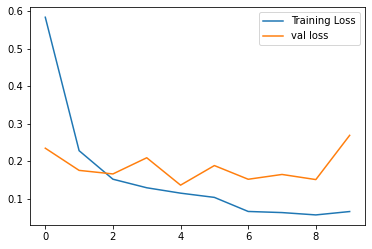

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history["loss"],label='Training Loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

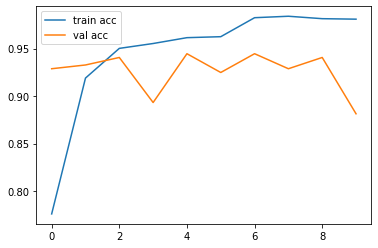

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [44]:
img=image.load_img('/content/drive/MyDrive/Cotton Disease/test/diseased cotton plant/dd (885)_iaip.jpg',target_size=(224,224))

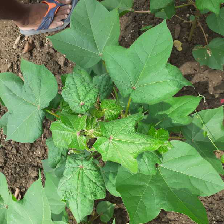

In [45]:
img

In [46]:
test_image=image.img_to_array(img)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)

In [47]:
result

array([[1.2404265e-06, 9.9897766e-01, 4.2424267e-06, 1.0169183e-03]],
      dtype=float32)

In [48]:
a=np.argmax(result, axis=1)

In [49]:
if a==0:
  print("DISEASED COTTON LEAF")
elif a==1:
  print("DISEASED COTTON PLANT")
elif a==2:
  print("FRESH COTTON LEAF")
else:
  print("FRESH COTTON PLANT")    

DISEASED COTTON PLANT
